# purpose:

To demonstrate and check that the preprocessing script is correctly working. I have qualitatively concluded that the script is working good.

In [2]:
import sys, os
dir1 = os.path.abspath(os.path.join(os.path.abspath(''), '..', '..'))
if not dir1 in sys.path: sys.path.append(dir1)

from utils.environment import setup_data_vars

setup_data_vars()

In [3]:
# View the results from directory 
id = 1
slice_num = 70
axis = 0
anatomy = 'Anorectum'
img_dir = os.path.join(os.environ.get('MedSAM_preprocessed'), 'imgs', f'axis{str(axis)}')
gt_dir = os.path.join(os.environ.get('MedSAM_preprocessed'), 'gts', anatomy.capitalize(), f'axis{str(axis)}')

img_path = os.path.join(img_dir, f'CT_zzAMLART_{str(id).zfill(3)}-{str(slice_num).zfill(3)}.npy')
gt_path = os.path.join(gt_dir, f'CT_{anatomy}_zzAMLART_{str(id).zfill(3)}-{str(slice_num).zfill(3)}.npy')

print('/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0/CT_zzAMLART_001-070.npy')
print(img_path)

print('/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Anorectum/axis0/CT_Anorectum_zzAMLART_001-070.npy')
print(gt_path)

/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0/CT_zzAMLART_001-070.npy
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0/CT_zzAMLART_001-070.npy
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Anorectum/axis0/CT_Anorectum_zzAMLART_001-070.npy
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Anorectum/axis0/CT_Anorectum_zzAMLART_001-070.npy


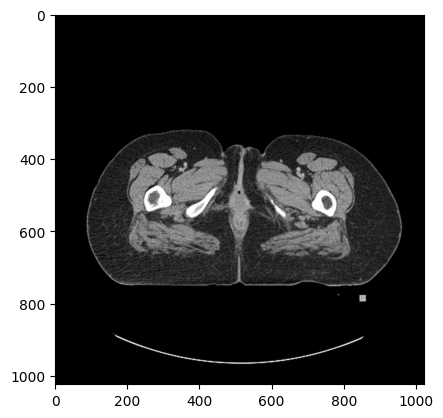

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Load the npy file
data = np.load(img_path)

# Display the image
plt.imshow(data)
plt.show()


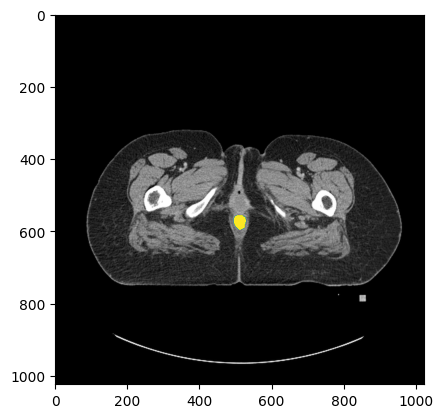

In [5]:
gt = np.load(gt_path)

alpha_mask_pred = np.where(gt > 0, 1, 0).astype(np.float32)
plt.imshow(data, cmap='gray')
plt.imshow(gt, alpha=alpha_mask_pred, cmap='viridis')
plt.show()

In [6]:
# For the given image id, create a subfigure of all the slices that contain segmentations.

id_slices_imgs = sorted([f for f in os.listdir(img_dir) if f.startswith(f'CT_zzAMLART_{str(id).zfill(3)}')])
id_slices_gts = sorted([f for f in os.listdir(gt_dir) if f.startswith(f'CT_{anatomy.capitalize()}_zzAMLART_{str(id).zfill(3)}')])

In [7]:
list(zip(id_slices_imgs, id_slices_gts))

[('CT_zzAMLART_001-070.npy', 'CT_Anorectum_zzAMLART_001-070.npy'),
 ('CT_zzAMLART_001-071.npy', 'CT_Anorectum_zzAMLART_001-071.npy'),
 ('CT_zzAMLART_001-072.npy', 'CT_Anorectum_zzAMLART_001-072.npy'),
 ('CT_zzAMLART_001-073.npy', 'CT_Anorectum_zzAMLART_001-073.npy'),
 ('CT_zzAMLART_001-074.npy', 'CT_Anorectum_zzAMLART_001-074.npy'),
 ('CT_zzAMLART_001-075.npy', 'CT_Anorectum_zzAMLART_001-075.npy'),
 ('CT_zzAMLART_001-076.npy', 'CT_Anorectum_zzAMLART_001-076.npy'),
 ('CT_zzAMLART_001-077.npy', 'CT_Anorectum_zzAMLART_001-077.npy'),
 ('CT_zzAMLART_001-078.npy', 'CT_Anorectum_zzAMLART_001-078.npy'),
 ('CT_zzAMLART_001-079.npy', 'CT_Anorectum_zzAMLART_001-079.npy'),
 ('CT_zzAMLART_001-080.npy', 'CT_Anorectum_zzAMLART_001-080.npy'),
 ('CT_zzAMLART_001-081.npy', 'CT_Anorectum_zzAMLART_001-081.npy'),
 ('CT_zzAMLART_001-082.npy', 'CT_Anorectum_zzAMLART_001-082.npy'),
 ('CT_zzAMLART_001-083.npy', 'CT_Anorectum_zzAMLART_001-083.npy'),
 ('CT_zzAMLART_001-084.npy', 'CT_Anorectum_zzAMLART_001-084.np

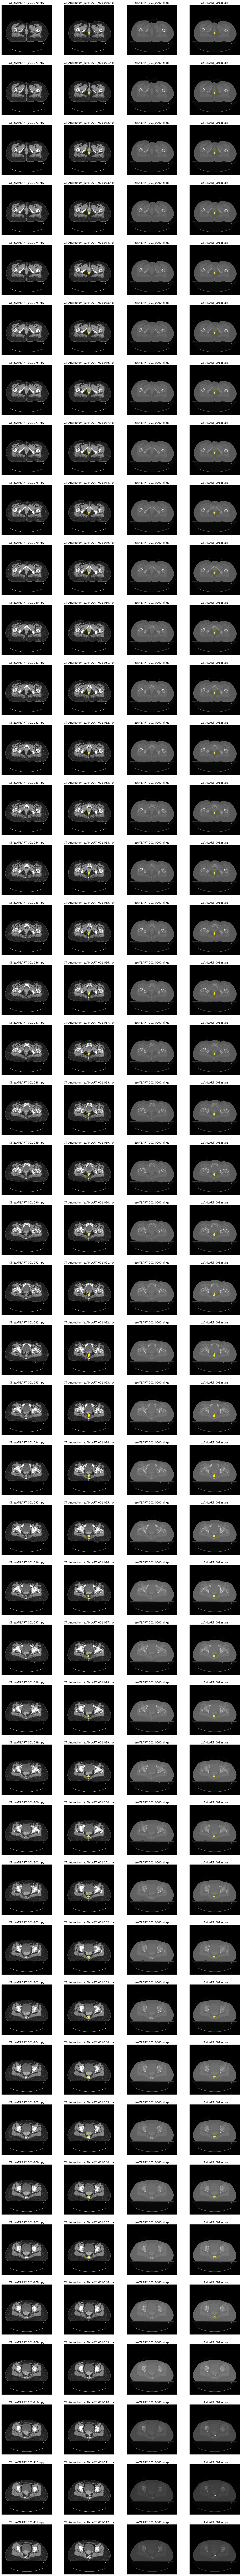

In [10]:
import SimpleITK as sitk

nrows = len(id_slices_imgs)
ncols = 4

fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))

for i, (img, gt) in enumerate(zip(id_slices_imgs, id_slices_gts)):
    # processed counterpart
    img_path = os.path.join(img_dir, img)
    gt_path = os.path.join(gt_dir, gt)
    data = np.load(img_path)
    gt_data = np.load(gt_path)
    alpha_mask_pred = np.where(gt_data > 0, 1, 0).astype(np.float32)
    axs[i, 0].imshow(data, cmap='gray')
    axs[i, 1].imshow(data, cmap='gray')
    axs[i, 1].imshow(gt_data, alpha=alpha_mask_pred, cmap='viridis')
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

    axs[i, 0].set_title(img)
    axs[i, 1].set_title(gt)

    # Now the un-processed counterpart
    id = int(img.split('_')[2].split('-')[0])
    slice_num = int(img.split('_')[2].split('-')[1].split('.')[0])
    axis = int(img_dir.split('axis')[1])

    slices = [slice(None)] * 3
    slices[axis] = slice_num

    unprocessed_img_path = os.path.join(os.environ.get('nnUNet_raw'), os.environ.get('Anorectum'), os.environ.get('data_trainingImages'), f'zzAMLART_{str(id).zfill(3)}_0000.nii.gz')
    unprocessed_gt_path = os.path.join(os.environ.get('nnUNet_raw'), os.environ.get('Anorectum'), os.environ.get('data_trainingLabels'), f'zzAMLART_{str(id).zfill(3)}.nii.gz')

    data = sitk.GetArrayFromImage(sitk.ReadImage(unprocessed_img_path))
    gt = sitk.GetArrayFromImage(sitk.ReadImage(unprocessed_gt_path))

    data = data[tuple(slices)]
    gt = gt[tuple(slices)]

    alpha_mask_pred = np.where(gt > 0, 1, 0).astype(np.float32)
    axs[i, 2].imshow(data, cmap='gray')
    axs[i, 3].imshow(data, cmap='gray')
    axs[i, 3].imshow(gt, alpha=alpha_mask_pred, cmap='viridis')
    axs[i, 2].axis('off')
    axs[i, 3].axis('off')

    axs[i, 2].set_title(f'zzAMLART_{str(id).zfill(3)}_0000.nii.gz')
    axs[i, 3].set_title(f'zzAMLART_{str(id).zfill(3)}.nii.gz')